In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Setting Path
path = r'/Users/pierremora/Desktop/08:20:2023 INSTACART BASKET ANALYSIS'


In [8]:
# Importing  dataframe
ords_prods_custmerged= pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'final_dataframe_no_pii.pkl'))

In [42]:
# analysing dtypes
ords_prods_custmerged.dtypes

user_id                     object
gender                      object
state                       object
age                          int64
number_of_dependants         int64
fam_status                  object
total_income                 int64
product_id                   int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
order_id                     int32
number_of_orders             int32
orders_day_of_week            int8
order_hour_of_day            int32
days_since_prior_order       int64
add_to_cart_order            int64
reordered                    int64
price_range_loc             object
busiest_days                object
busiest_period_of_day       object
max_order                    int32
loyalty_flag                object
avg_price                  float64
spending_flag               object
median_order_day           float64
frequency_flag              object
_merge              

In [6]:
ords_prods_custmerged.head(5)

,user_id,first_name,last_name,gender,state,age,number_of_dependants,fam_status,total_income,order_id,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_order_day,frequency_flag,_merge
0,51,Stephanie,Jensen,Female,Wyoming,37,1,married,71190,620842,...,Regularly busy,Slowest days,Most Orders,18.119512,Loyal customer,7.588629,Low Spender,7.0,frequent_customer,both
1,51,Stephanie,Jensen,Female,Wyoming,37,1,married,71190,1530377,...,Regularly busy,Regularly busy,Most Orders,18.119512,Loyal customer,7.588629,Low Spender,7.0,frequent_customer,both
2,51,Stephanie,Jensen,Female,Wyoming,37,1,married,71190,3096556,...,Regularly busy,Slowest days,Most Orders,18.119512,Loyal customer,7.588629,Low Spender,7.0,frequent_customer,both
3,51,Stephanie,Jensen,Female,Wyoming,37,1,married,71190,1912145,...,Regularly busy,Slowest days,Most Orders,18.119512,Loyal customer,7.588629,Low Spender,7.0,frequent_customer,both
4,51,Stephanie,Jensen,Female,Wyoming,37,1,married,71190,2179494,...,Regularly busy,Regularly busy,Most Orders,18.119512,Loyal customer,7.588629,Low Spender,7.0,frequent_customer,both


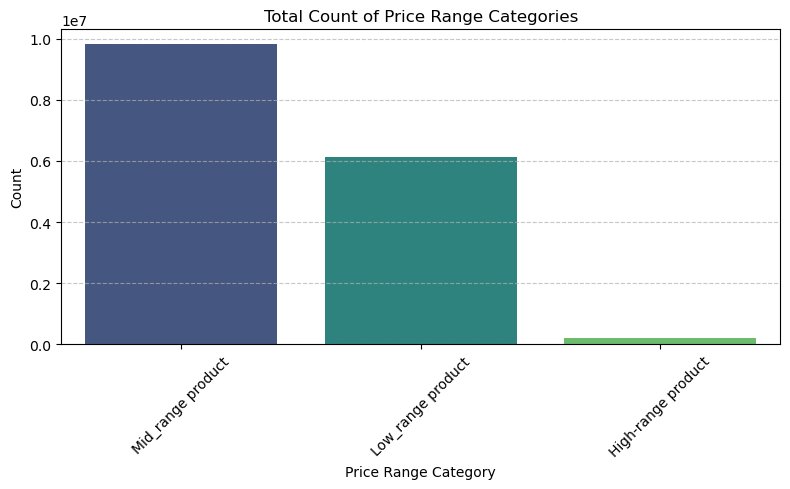

In [8]:
# creating a bar chart showing the total count of the three different price range variables ('low range product,' 'mid range product,' and 'high range product') in the price_range_loc column of the ords_prods_merged

# Count the occurrences of each price range category
price_range_counts = ords_prods_custmerged['price_range_loc'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=price_range_counts.index, y=price_range_counts.values, palette="viridis")
plt.title('Total Count of Price Range Categories')
plt.xlabel('Price Range Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the bar chart as a PNG image
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_chart_price_range_counts.png'), dpi=300, bbox_inches='tight')

# Show the bar chart
plt.show()


In [43]:
# importing department_id dataframe
df_dep = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'depart.csv'), index_col = False)

In [44]:
df_dep_t = df_dep.T

In [45]:
df_dep_t.reset_index()

,index,0
0,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta


In [46]:
# taking the first row of the dataframe for header
new_header = df_dep_t.iloc[0]

In [47]:
df_dep_t_new = df_dep_t[1:]

In [48]:
df_dep_t_new.columns = new_header

In [49]:
df_dep_t_new

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [50]:
data_dict = df_dep_t_new.to_dict('index')

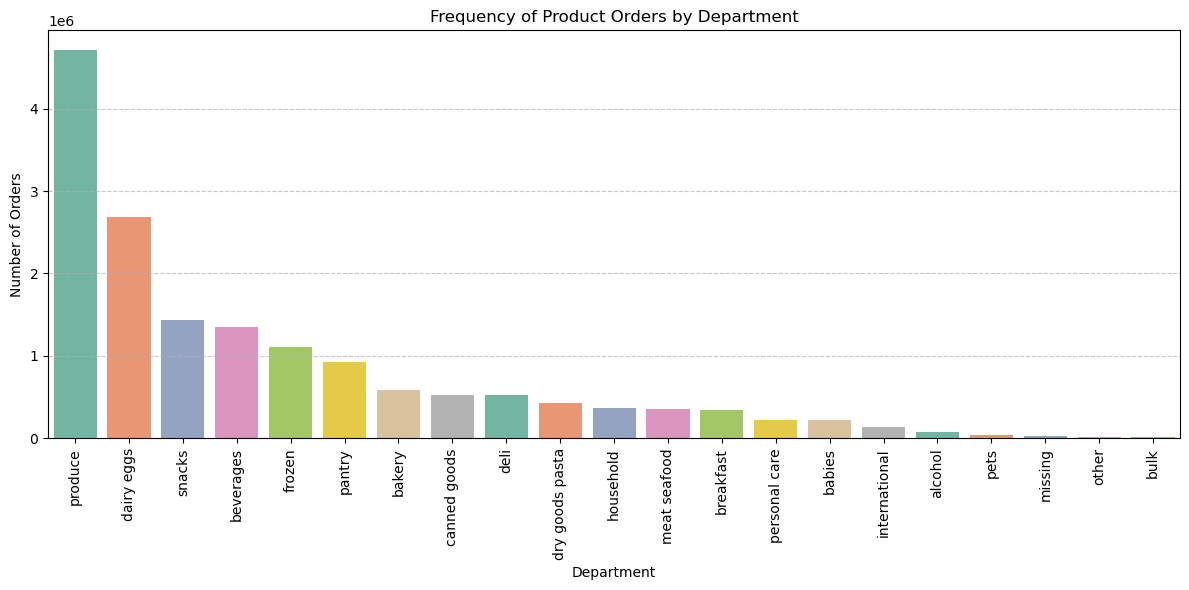

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data dictionary mapping department IDs to department names
department_dict = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'
}

# Count the number of orders per department
department_order_counts = ords_prods_custmerged['department_id'].value_counts()

# Map department IDs to department names for the x-axis labels
department_labels = [department_dict.get(dept_id) for dept_id in department_order_counts.index]

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=department_labels, y=department_order_counts.values, palette="Set2")
plt.title('Frequency of Product Orders by Department')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the bar chart as a PNG image
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_chart_department_order_frequency.png'), dpi=300, bbox_inches='tight')

# Show the bar chart
plt.show()


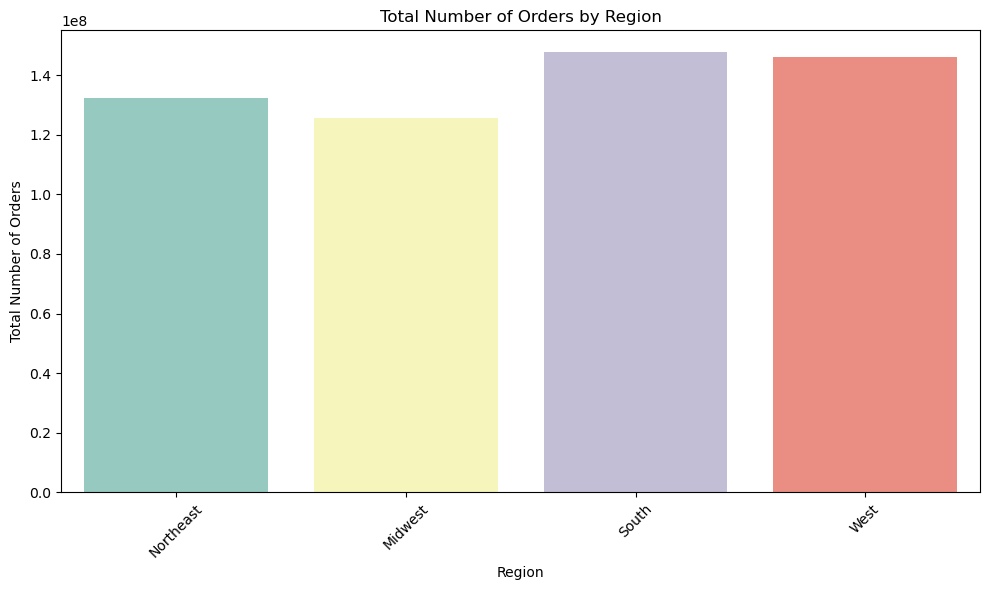

In [12]:


# Grouping the data by region and calculating the total number of orders in each region
order_counts_by_region = ords_prods_custmerged.groupby('Region')['number_of_orders'].sum().reset_index()

# Define custom labels for the regions
region_labels = {
    'Region 1': 'Northeast',
    'Region 2': 'Midwest',
    'Region 3': 'South',
    'Region 4': 'West'
}

# Map the custom labels to the 'Region' column
order_counts_by_region['Region'] = order_counts_by_region['Region'].map(region_labels)

# Creating a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=order_counts_by_region, x='Region', y='number_of_orders', palette='Set3')
plt.title('Total Number of Orders by Region')
plt.xlabel('Region')
plt.ylabel('Total Number of Orders')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()

# Saving the bar chart as a PNG image (if needed)
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'total_orders_by_region.png'), dpi=300, bbox_inches='tight')

# Show the bar chart
plt.show()


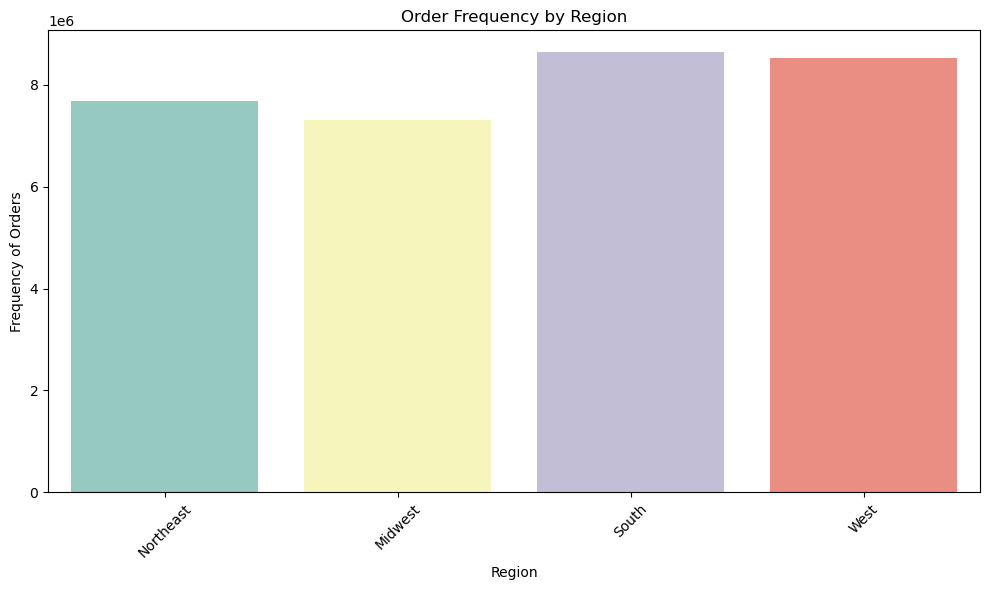

In [14]:
# Grouping the data by region and calculating the frequency of orders in each region
order_frequency_by_region = ords_prods_custmerged.groupby('Region')['number_of_orders'].count().reset_index()

# Define custom labels for the regions
region_labels = {
    'Region 1': 'Northeast',
    'Region 2': 'Midwest',
    'Region 3': 'South',
    'Region 4': 'West'
}

# Mapping the custom labels to the 'Region' column
order_frequency_by_region['Region'] = order_frequency_by_region['Region'].map(region_labels)

# Creating a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=order_frequency_by_region, x='Region', y='number_of_orders', palette='Set3')
plt.title('Order Frequency by Region')
plt.xlabel('Region')
plt.ylabel('Frequency of Orders')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()

# Saving the bar chart as a PNG image (if needed)
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'order_frequency_by_region.png'), dpi=300, bbox_inches='tight')

# Show the bar chart
plt.show()


<Figure size 1200x800 with 0 Axes>

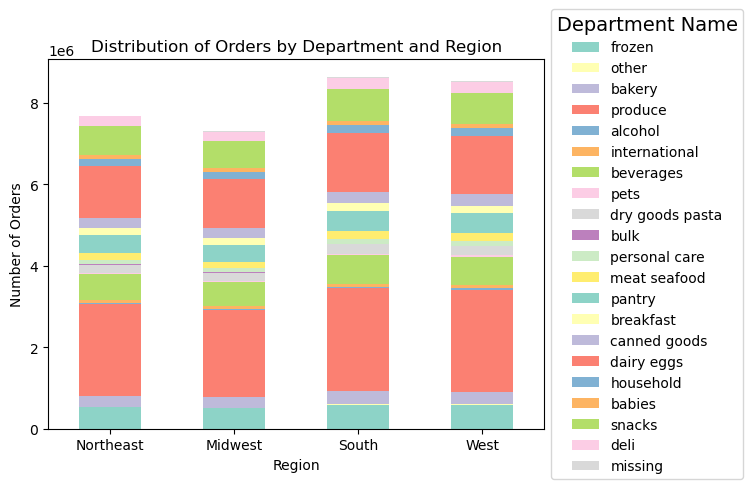

In [20]:
# Department data dictionary
department_dict = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'
}

# Group the data by 'Region' and 'department_id' and calculate the count of orders for each combination
department_order_counts = ords_prods_custmerged.groupby(['Region', 'department_id'])['order_id'].count().unstack().fillna(0)

# Rename the columns of the DataFrame to department names
department_order_counts.columns = [department_dict.get(dept_id, f'Department {dept_id}') for dept_id in department_order_counts.columns]

# Define custom labels for the regions
region_labels = {
    'Region 1': 'Northeast',
    'Region 2': 'Midwest',
    'Region 3': 'South',
    'Region 4': 'West'
}

# Map the custom labels to the index (regions)
department_order_counts.index = department_order_counts.index.map(region_labels)

# Define a color palette for different department IDs
color_palette = sns.color_palette("Set3", n_colors=len(department_dict))

# Create a stacked bar chart with custom colors
plt.figure(figsize=(12, 8))
ax = department_order_counts.plot(kind='bar', stacked=True, color=color_palette)

# Set labels and title
plt.title('Distribution of Orders by Department and Region')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Move the legend to the right
plt.legend(title='Department Name', title_fontsize='14', loc='center left', bbox_to_anchor=(1.0, 0.5))

# Save the stacked bar chart as a PNG image (if needed)
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'department_order_distribution.png'), dpi=300, bbox_inches='tight')

# Show the stacked bar chart
plt.show()


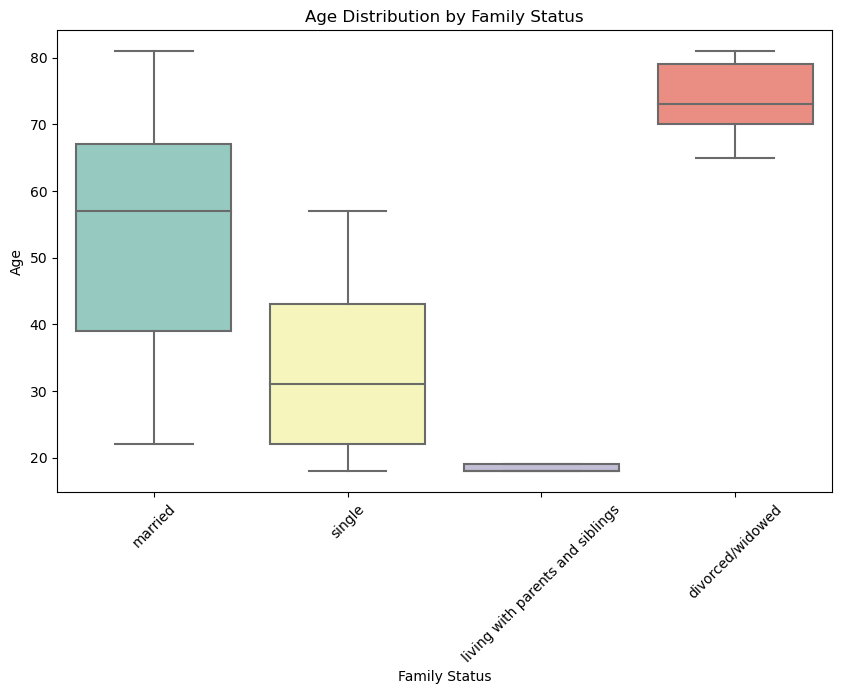

In [24]:
# Analyzing  whether there is a connection between age and family status in terms of ordering habits, Creating a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=ords_prods_custmerged, x='fam_status', y='age', palette='Set3')
plt.title('Age Distribution by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Age')
plt.xticks(rotation=45)

# saving
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'age_distribution_by_family_status.png'), dpi=300, bbox_inches='tight')
# Show the box plot
plt.show()


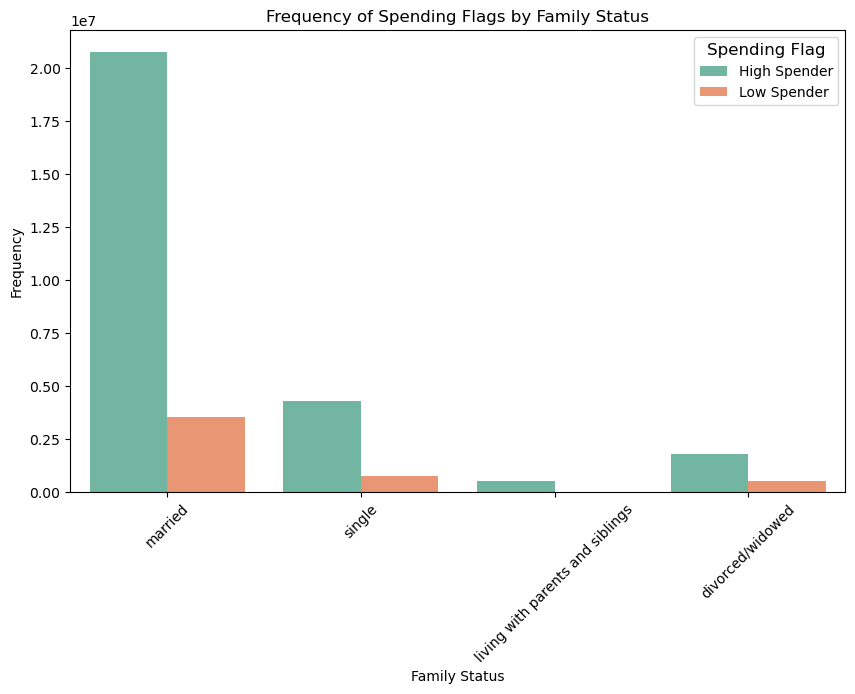

In [27]:
# Creating a bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=ords_prods_custmerged, x='fam_status', hue='spending_flag', palette='Set2')
plt.title('Frequency of Spending Flags by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Spending Flag', title_fontsize='12', loc='upper right')

# Saving the bar chart as a PNG image
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'spending_flags_by_family_status.png'), dpi=300, bbox_inches='tight')

# Show the bar chart
plt.show()


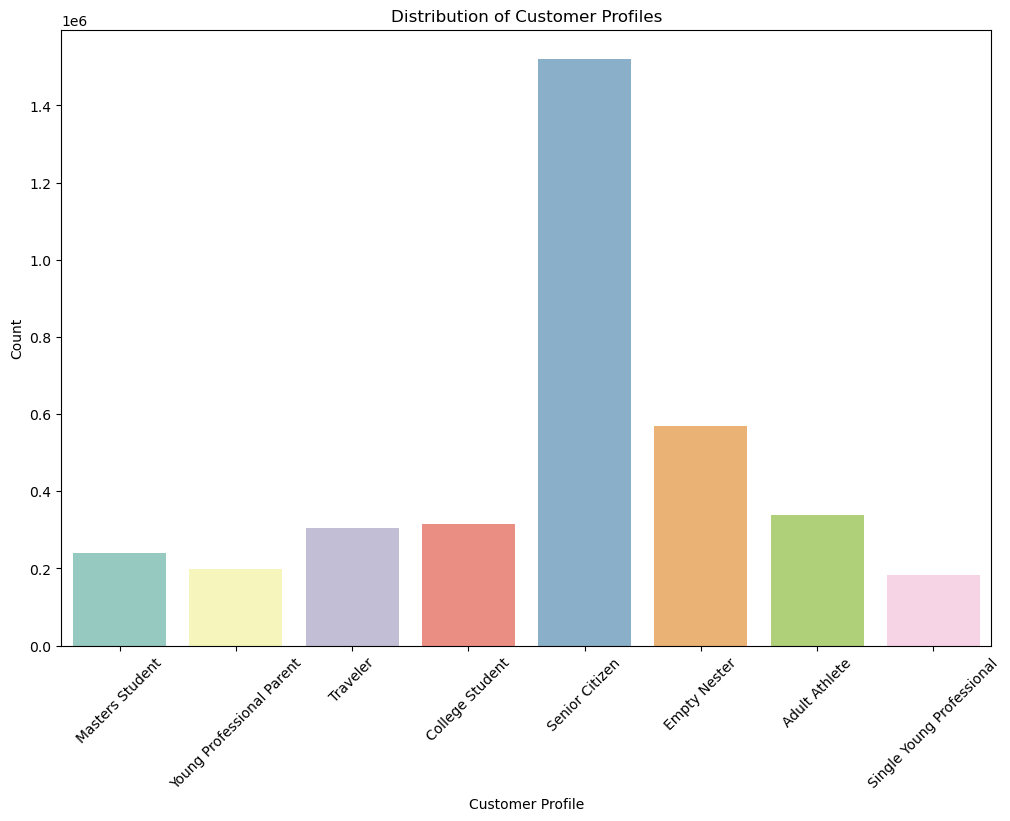

In [29]:
# creating a bar chart showing the distribution of each customer_profile based on demographic information
plt.figure(figsize=(12, 8))
sns.countplot(data=ords_prods_custmerged, x='customer_profile', palette='Set3')
plt.title('Distribution of Customer Profiles')
plt.xlabel('Customer Profile')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Saving the bar chart as a PNG image
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'customer_profile_distribution.png'), dpi=300, bbox_inches='tight')

# Show the bar chart
plt.show()



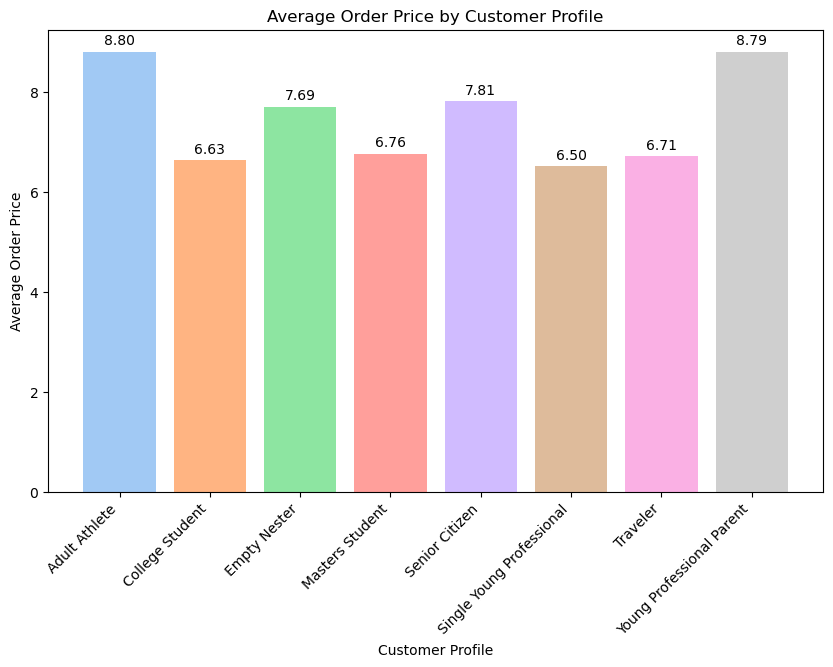

In [33]:

# Group by 'customer_profile' and calculate the average order price
average_order_prices = ords_prods_custmerged.groupby('customer_profile')['prices'].mean().reset_index()

# Define a color palette for the bar chart
colors = sns.color_palette('pastel')

# Create a bar chart with different colors for each customer profile
plt.figure(figsize=(10, 6))
bars = plt.bar(average_order_prices['customer_profile'], average_order_prices['prices'], color=colors)
plt.xlabel('Customer Profile')
plt.ylabel('Average Order Price')
plt.title('Average Order Price by Customer Profile')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Add data labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')

# save png
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'customer_profile_distribution.png'), dpi=300, bbox_inches='tight')

# Show the bar chart
plt.show()


In [4]:
# Importing  dataframe
active_cust= pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'active_customers_ords_prods.pkl'))

In [7]:
active_cust.shape

(24235104, 31)

In [9]:
ords_prods_custmerged.shape

(32163194, 32)